/home/rubber/.conda/envs/obai/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Text(0, 0.5, 'MSE (true - target state)')

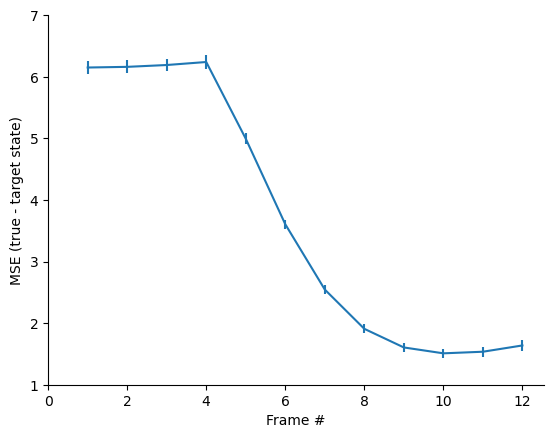

In [1]:
from active_dsprites import active_dsprites
from matplotlib import pyplot as plt
import torch, pickle, sys
from math import sqrt

sys.path.append('../AttentionExperiments/src/')

from active_3dsprites import active_3dsprites_vecenv, active_3dsprites_env

ax = plt.subplot(111)

# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-1.0_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.1_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.2_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.3_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-1.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-2.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_5.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-1.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-True.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-0.1.pkl'

# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-1.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-False_APmethod-hedge.pkl'
fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-False_APmethod-hedge.pkl' #BEST SO FAR
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v72_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-False_APmethod-hedge.pkl' #BEST SO FAR

with open(fpath, 'rb') as fh:
    foo = pickle.load(fh)

e = []
for i in range(len(foo)):     
    ad = active_3dsprites_vecenv(init_data=(foo[i]['true_states'][:,-1], foo[i]['true_bgc']), ctx = {'rule_goal': 'IfHalfTorus'})
    # ad = active_dsprites(data=(foo[i]['true_states'][:,-1], foo[i]['true_bgc']), rule_goal='HeartXORSquareLR+TMB')
    goal = ad.get_goal_states()    
    e.append((foo[i]['true_states']-goal.unsqueeze(1)))
    
e = torch.cat(e,0)

# mean_plot = (e[:,:,:,6:]**2).mean((2,3))
# lb = torch.quantile(mean_plot, 0.25, dim=0)
# ub = torch.quantile(mean_plot, 0.75, dim=0)
# mean_plot, _ = torch.median(mean_plot,0)
# err_plot = torch.stack((
#     mean_plot-lb,
#     ub-mean_plot
# ), 0)

mean_plot = (e[:,:,:,6:]**2).mean((0,2,3))

err_plot = (e[:,:,:,6:]**2).mean((2,3)).std(0)/sqrt(e.shape[0])

ax.errorbar(torch.arange(1,mean_plot.shape[0]+1), mean_plot, err_plot)

ax.set_ylim([1, 7])
ax.set_xticks(torch.arange(0,mean_plot.shape[0]+1,2))
ax.spines[['right', 'top']].set_visible(False)
ax.set_xlabel('Frame #')
ax.set_ylabel('MSE (true - target state)')
# plt.savefig('./results/NeurIPS/IfHalfTorus_MSE.eps', format='eps')

In [ ]:
from torchvision.utils import make_grid

def make_task_grid(foo, j, rule_goal='IfHalfTorus', with_masks=True, with_recs=True):
    colors = torch.tensor((
        [0.1059,    0.6196,    0.4667], #0: Green
        [0.4588,    0.4392,    0.7020], #1: Purple
        [0.9059,    0.1608,    0.5412], #2: Pink   
        [0.9020,    0.6706,    0.0078], #3: Yellow   
        [0.7490,    0.3569,    0.0902], #4: Brown
        [0.4000,    0.4000,    0.4000], #5: Grey
        )).to(torch.float)

    bgc = foo['true_bgc'][j]
    idx = foo['mask']['cat'].to(torch.long)
    mask_ims = colors[idx].permute((0,1,4,2,3))
    F = mask_ims.shape[1]

    ad = active_3dsprites_vecenv(init_data=(foo['true_states'][:,-1], foo['true_bgc']), ctx = {'rule_goal': rule_goal})
    goal = ad.get_goal_states()
    ad_goal = active_3dsprites_vecenv(init_data=(goal, foo['true_bgc']), ctx={})
    
    goal_ims, _ = ad_goal.render()
    N,_,H,W = goal_ims.shape    

    full_grid = make_grid(torch.cat((foo['ims'][j], 
        foo['rec'][j] if with_recs else torch.tensor([]),
        mask_ims[j] if with_masks else torch.tensor([]), 
        foo['pref_rec'][j]),0).view(-1, 3, 64, 64), nrow=F, pad_value=0 if bgc>0 else 0.25).permute(1,2,0)        
    
    action_fields = foo['action_fields'][j].squeeze()
    true_fg_masks = (foo['true_masks'][j]>0).unsqueeze(1)        
    action_fields = torch.cat((action_fields[1:], torch.zeros((1,) + action_fields.shape[1:]))) #Shift action fields in time so they are one frame earlier
    action_fields *= true_fg_masks #This eliminates background actions
    action_fields_abs = action_fields.abs().sum(1,True).expand(-1,3,-1,-1)*(-1) #Times minus one so we can distinguish it in the image grid        
    s = torch.tensor(action_fields.shape)
    s[1]=1
    # action_fields_dir = torch.cat((action_fields, torch.zeros(s.tolist())), 1)    
    action_fields_dir = action_fields.clone()
    
    arrow_loc_grid = make_grid(torch.cat((action_fields_abs, 
        foo['rec'][j],
        mask_ims[j], 
        foo['pref_rec'][j]),0).view(-1, 3, 64, 64), nrow=F).permute(1,2,0) #This grid has the exact same dimensions as the grid we want to plot arrows on, so we can find their locations by finding the negative values
    
    arrow_dir_grid = make_grid(torch.cat((action_fields_dir, 
        foo['rec'][j],
        mask_ims[j], 
        foo['pref_rec'][j]),0).view(-1, 3, 64, 64), nrow=F).permute(1,2,0) #This grid has the exact same dimensions as the grid we want to plot arrows on, so we can find their locations by finding the negative value
       

    plt.figure(figsize=(30,30))
    plt.imshow(full_grid)
    plt.axis('off')

    # idx = torch.argwhere(arrow_loc_grid[:,:,0]<0)
    # for loc in idx:
    #     dx, dy = arrow_dir_grid[loc[0],loc[1],:2]            
    #     plt.plot(loc[1],loc[0],'or', markersize=4)
    #     plt.arrow(loc[1],loc[0],dx*10,dy*10, color='r',lw=2,rasterized=False, capstyle='round', antialiased=True, head_width=4, head_length=4)

    plt.show()

    plt.figure(figsize=(4,4))
    plt.imshow(goal_ims[j].permute(1,2,0))
    plt.axis('off')
    plt.show()


     

In [ ]:
# Example grids for IfHalfTorus task

from torchvision.utils import make_grid
from matplotlib import pyplot as plt
import torch

# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-1.0_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'  
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-0.1_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v70_goal-net-actions_lambda-2.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-1.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-True.pkl'
# fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-1.0_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-False_APmethod-hedge.pkl'
fpath = '/home/rubber/C2PO/results/C2PO_snellius-v71_goal-net-actions_lambda-0.5_v-sd-0.15625_unit-prec_af_4_5_6_7_8_9_10_11-num_sprites_3-planning_horizon_3-ignore_goal_vel-False_APmethod-hedge.pkl'

with open(fpath, 'rb') as fh:
    foo = pickle.load(fh)

for i in range(2):     
    ad = active_3dsprites_vecenv(init_data=(foo[i]['true_states'][:,-1], foo[i]['true_bgc']), ctx={'rule_goal': 'IfHalfTorus'})
    goal = ad.get_goal_states()
    ad_goal = active_3dsprites_env(init_data=(goal, foo[i]['true_bgc']), ctx={})

    err = foo[i]['true_states']-goal.unsqueeze(1)
    err = (err[:,:,:,8:]**2).mean((2,3))
    
    for j in range(foo[0]['rec'].shape[0]):     
        plt.figure()
        plt.plot(torch.arange(1,err.shape[1]+1), err[j])
        plt.show()

        make_task_grid(foo[i], j, rule_goal='IfHalfTorus', with_masks=False, with_recs=False)   
    
        



In [ ]:
print(foo[0]['true_states'][0,:,:,8:].diff(dim=0))
print(foo[0]['true_states'][0,0,:,3])